In [202]:
import warnings
warnings.filterwarnings('ignore')
# Import libraries
import pandas                        as pd
import numpy                         as np
import seaborn                       as sns
import matplotlib.pyplot             as plt

# sklearn
from sklearn.preprocessing           import StandardScaler
from sklearn.pipeline                import Pipeline
from sklearn.linear_model            import LogisticRegression
from sklearn.naive_bayes             import MultinomialNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction      import DictVectorizer
from sklearn.metrics                 import confusion_matrix, \
                                            ConfusionMatrixDisplay

from nltk.stem import WordNetLemmatizer 
from textblob import Word
import string
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

In [203]:
# Read in .csv files of NFL and NCAA
df1 = pd.read_csv('data/nfl.csv')
df2 = pd.read_csv('data/ncaa.csv')
# Merge two dataframes
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)
# rename data in subreddit column
df.rename(columns = {'subreddit':'is_nfl'}, inplace = True)
# Create label column
df['is_nfl'] = df['is_nfl'].map({'nfl':1, 'NCAA':0})

In [204]:
# Baseline score
df['is_nfl'].value_counts(normalize=True).mul(100).round(2)

1    50.63
0    49.37
Name: is_nfl, dtype: float64

In [205]:
df.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=True)

### First Model

- Feature = 'title', no dropping crossover words

In [206]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [207]:
# CountVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe2_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'CountVectorizer+NaiveBayes:         {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')
# ==========================================================================
pipe3 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe3_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:       {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')
# =========================================================================

# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest

pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')
# ==========================================================================
pipe5 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe5_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'TfidVectorizer+NaiveBayes:          {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe6_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidVectorizer+RandomForest:        {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.9394564594456007
Best params:{'cv__max_features': 900, 'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}

CountVectorizer+NaiveBayes:         0.9192441106385546
Best params:{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+RandomForest:       0.9231623080867493
Best params:{'cv__max_features': 600, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

TfidVectorizer+LogisticRegression:  0.9371308780502519
Best params:{'tv__max_features': 800, 'tv__ngram_range': (1, 3), 'tv__stop_words': 'english'}

TfidVectorizer+NaiveBayes:          0.9223388531957892
Best params:{'tv__max_features': 1000, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}

TfidVectorizer+RandomForest:        0.924700630410521
Best params:{'tv__max_features': 900, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}



In [208]:
# Check overfitting form best score model
vc = CountVectorizer(max_features=900, ngram_range=(1,2), stop_words='english')
X_train_vc = vc.fit_transform(X_train)
X_test_vc  = vc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_vc,y_train)
print(f'Training Score: {lr.score(X_train_vc,y_train)}')
print(f'Testing Score:  {lr.score(X_test_vc,y_test)}')

Training Score: 0.9821428571428571
Testing Score:  0.9411764705882353


In [209]:
# Get predictions from best model
# TfidVectorizer + LogisticRegression
y_pred = grid1.predict(X_test)
# Save confusion matrix values
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate the specificity
spec = tn/(tn+fp)
print()
print(f'Specifivity: {spec}')


Specifivity: 0.9685534591194969


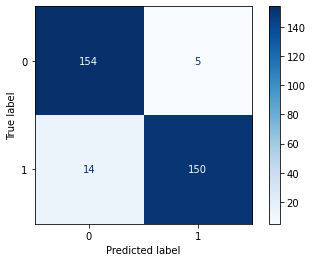

In [210]:
ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=grid4.classes_).plot(cmap=plt.cm.Blues);

### Error analysis: First Model

- Hypothesis: crossover words in both nfl and ncaa dataframe

In [211]:
df.apply(lambda row: row.astype(str).str.contains('game', 'team').any(), 
         axis=1).value_counts(normalize=True).mul(100).round(2)

False    80.38
True     19.62
dtype: float64

In [212]:
(fn/tn*100).round(2)

9.09

- 19.62 % of words and 15.28% of false-negative/true-negative

### Second Model

- First Model + drop common words from NFL and NCAA (18 + 2 crossover words)

In [213]:
# lower case and clean special characters 
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['title'] = df['title'].str.replace('[^\w\s]','')
df['title'].head()

0    post game thread cincinnati bengals 23 at balt...
1    game thread cincinnati bengals 22 at baltimore...
2    highlight cardinals miss the field goal and ea...
3        highlight roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object

In [214]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [215]:
# CounterVectorize NFL and NCAA titles
cvec = CountVectorizer(stop_words='english')
df1_cvec= cvec.fit_transform(df1['title'])
df1_cvec = pd.DataFrame(df1_cvec.todense(), columns=cvec.get_feature_names_out())
df2_cvec= cvec.fit_transform(df2['title'])
df2_cvec = pd.DataFrame(df2_cvec.todense(), columns=cvec.get_feature_names_out())
# Find and make a list of top 10 common words
freq1 = pd.Series(df1_cvec.sum().sort_values(ascending =False)[:10])
freq1 = list(freq1.index) 
freq2 = pd.Series(df2_cvec.sum().sort_values(ascending =False)[:10])
freq2 = list(freq2.index)

In [216]:
# Drop frequent words from NFL and NCAA
X_train = X_train.str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1 + freq2))

In [217]:
# CountVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe2_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'CountVectorizer+NaiveBayes:         {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')
# ==========================================================================
pipe3 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe3_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:       {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')
# =========================================================================

# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest

pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')
# ==========================================================================
pipe5 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe5_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'TfidVectorizer+NaiveBayes:          {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe6_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidVectorizer+RandomForest:        {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.8850843060959793
Best params:{'cv__max_features': 900, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

CountVectorizer+NaiveBayes:         0.8563659397339608
Best params:{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+RandomForest:       0.8586704069013363
Best params:{'cv__max_features': 600, 'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.8866527916025699
Best params:{'tv__max_features': 900, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}

TfidVectorizer+NaiveBayes:          0.858679455856182
Best params:{'tv__max_features': 1000, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}

TfidVectorizer+RandomForest:        0.8540162277923568
Best params:{'tv__max_features': 800, 'tv__ngram_range': (1, 2), 'tv__stop_words': 'english'}



In [218]:
# Check overfitting form best score model
vc = TfidfVectorizer(max_features=900, ngram_range=(1,1), stop_words='english')
X_train_vc = vc.fit_transform(X_train)
X_test_vc  = vc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_vc,y_train)
print(f'Training Score: {lr.score(X_train_vc,y_train)}')
print(f'Testing Score:  {lr.score(X_test_vc,y_test)}')

Training Score: 0.9572981366459627
Testing Score:  0.8947368421052632



Specifivity: 0.9371069182389937


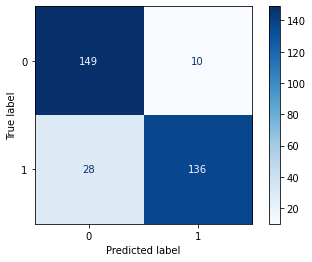

In [219]:
# Get predictions from best model
# CounterVectorizer + LogisticRegression
y_pred = grid1.predict(X_test)
# Save confusion matrix values
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate the specificity
spec = tn/(tn+fp)
print()
print(f'Specifivity: {spec}')
ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=grid4.classes_).plot(cmap=plt.cm.Blues);

- More False-negative and Lesser True-negative compare to the First model

### Error Analysis: Second Model

In [220]:
# observe False negative rows

In [221]:
# make y_test and y_prob dataframe
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_pred,
                        'predicted_probs':
                        grid3.predict_proba(X_test).round(2)[:,1]})

# merge new dataframe to the original one
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

# filter out False negative rows 
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.7)]

,is_nfl,predicted_values,predicted_probs,title
1551,0,0,0.76,northwestern state point guard jalan west suff...
1274,0,1,0.79,vermonts josh speidel overcomes traumatic brai...
1036,0,1,0.83,denver post column ncaa as we know it is dead ...
1599,0,0,0.81,any division i or ii schools that dont give an...
834,0,1,0.75,the greatest pumpfake in football history
1212,0,1,0.73,oklahoma state gets postseason ban 3 years of ...
1432,0,1,0.94,that opening touchdown drive for michigan was ...
1382,0,0,0.91,help with my fathers thesis by giving us your ...
1483,0,0,0.72,serious if unc basketball athletes dont go to ...
1281,0,1,0.91,youngest coach in ncaa division 1 history


In [234]:
# Observe high predicted_probs fasle-negative
print(df_results['title'][1432])
print('')
print(df_results['title'][1281])

that opening touchdown drive for michigan was almost too easy

youngest coach in ncaa division 1 history


- After observing False Negative rows, we noticed that there are specific names that our model might not weighted it strong enough to be predictive  

### Third Model

- Model 2 + Lemmatization

In [223]:
# Lemmatization
X_train = X_train.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [224]:
# CountVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe2_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'CountVectorizer+NaiveBayes:         {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')
# ==========================================================================
pipe3 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe3_params = {'cv__max_features': range(100,1001,100),
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:       {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')
# =========================================================================

# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest

pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidfVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')
# ==========================================================================
pipe5 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe5_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'TfidfVectorizer+NaiveBayes:          {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe6_params = {'tv__max_features': range(100,1001,100),
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2),(1,3)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidfVectorizer+RandomForest:        {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.8835188369076704
Best params:{'cv__max_features': 900, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+NaiveBayes:         0.864908153108316
Best params:{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+RandomForest:       0.8586915211293096
Best params:{'cv__max_features': 600, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidfVectorizer+LogisticRegression:  0.8874068711730463
Best params:{'tv__max_features': 1000, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}

TfidfVectorizer+NaiveBayes:          0.8648991041534704
Best params:{'tv__max_features': 1000, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}

TfidfVectorizer+RandomForest:        0.8586885048110278
Best params:{'tv__max_features': 700, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



In [225]:
# Check overfitting form best score model
vc = TfidfVectorizer(max_features=1000, ngram_range=(1,1), stop_words='english')
X_train_vc = vc.fit_transform(X_train)
X_test_vc  = vc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_vc,y_train)
print(f'Training Score: {lr.score(X_train_vc,y_train)}')
print(f'Testing Score:  {lr.score(X_test_vc,y_test)}')

Training Score: 0.9611801242236024
Testing Score:  0.8204334365325078



Specifivity: 0.8742138364779874


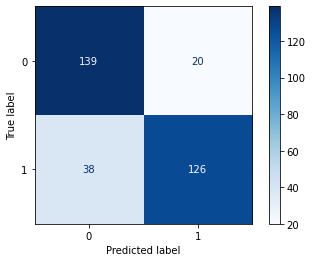

In [226]:
# Get predictions from best model
# TfidVectorizer + LogisticRegression
y_pred = grid4.predict(X_test)
# Save confusion matrix values
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate the specificity
spec = tn/(tn+fp)
print()
print(f'Specifivity: {spec}')
ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=grid4.classes_).plot(cmap=plt.cm.Blues);

### Error Analysis: Third Model

In [227]:
# make y_test and y_prob dataframe
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_pred,
                        'predicted_probs':
                        grid3.predict_proba(X_test).round(2)[:,1]})

# merge new dataframe to the original one
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

# filter out False negative rows 
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.7)].sort_values

,is_nfl,predicted_values,predicted_probs,title
1036,0,1,0.80,denver post column ncaa as we know it is dead ...
1599,0,0,0.82,any division i or ii schools that dont give an...
1199,0,1,0.73,week 256 oof
834,0,1,0.81,the greatest pumpfake in football history
1397,0,0,0.94,yahoo pick em tourney app glitch
1491,0,1,0.95,ayton or doncic 1st 2018 draft pick
1432,0,1,0.97,that opening touchdown drive for michigan was ...
878,0,1,0.71,im curious if i do good in first semester and ...
1281,0,1,0.91,youngest coach in ncaa division 1 history
1383,0,1,0.71,unpopular opinion dont cry when you lose


In [235]:
# Observe high predicted_probs fasle-negative
print(df_results['title'][1432])
print('')
print(df_results['title'][1491])

that opening touchdown drive for michigan was almost too easy

ayton or doncic 1st 2018 draft pick


- Error seems to be the same with Second Model and Lemmatizing make prediction harder for the model

### Fourth Model

- Logistic Regression using various quantiative values

In [229]:
## Number of words in the text ##
df["num_words"] = df["title"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["title"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["title"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


## Average length of the words in the text ##
df["mean_word_len"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [230]:
# Set X and y
X = df[['num_words', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'mean_word_len']]
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [231]:
# Instantiate our StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform(X_test)
# Instantiate LogisticRegression
logreg =LogisticRegression()
logreg.fit(X_train_sc, y_train)
logreg.predict(X_test_sc)

print(f'Logistic Regression Intercept:      {logreg.intercept_}')
print(f'Logistic Regression Coefficient(s): {logreg.coef_}')
print(f'Training accuracry:                 {logreg.score(X_train_sc, y_train)}')
print(f'Testing accuracry:                  {logreg.score(X_test_sc, y_test)}')

Logistic Regression Intercept:      [0.21694774]
Logistic Regression Coefficient(s): [[ 0.88260735  0.60622164  0.59296597 -0.75075728  0.31444703 -0.36971079]]
Training accuracry:                 0.7104037267080745
Testing accuracry:                  0.6965944272445821


- num_words has the highest coef.

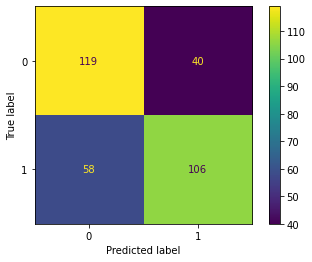

In [232]:
y_preds_logreg = logreg.predict(X_test_sc)
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot();

### Error Analysis: Fourth Model

In [233]:
# make y_test and y_prob dataframe
pred_df = pd.DataFrame({'is_nfl': y_test, 'predicted_values': y_pred,
                        'predicted_probs':
                        logreg.predict_proba(X_test).round(2)[:,1]})

# merge new dataframe to the original one
df_results = pd.merge(pred_df, df['title'], left_index=True, right_index=True)

# filter out False negative rows 
df_results[(df_results['is_nfl']==0) & (df_results['predicted_probs'] > 0.7)]

,is_nfl,predicted_values,predicted_probs,title
1247,0,0,1.0,senior d1 spring sport athletes
1304,0,0,1.0,with apologies to notre dame
833,0,0,1.0,marvin harrison jr emeka egbuka best wr duo i...
1386,0,0,1.0,ehab amin 04 for the ducks
1489,0,0,1.0,ncaa mens basketball highlights
...,...,...,...,...
841,0,0,1.0,weight room warriors the countrys freakiest co...
990,0,0,1.0,video game fans ncaa 14 dynasty season 2 uc ...
979,0,0,1.0,videogame fans law school finals delayed rele...
1311,0,0,1.0,new to college basketball can someone explain ...


- Using only quantiative values might not be great option with text data analysis, but there are no overfitting